In [1]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow
from PIL import Image

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (60000, 28, 28)
Testing Shape: (10000, 28, 28)


In [7]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [8]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_flat, y_train)
lr_pred = lr_model.predict(X_test_flat)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.9256


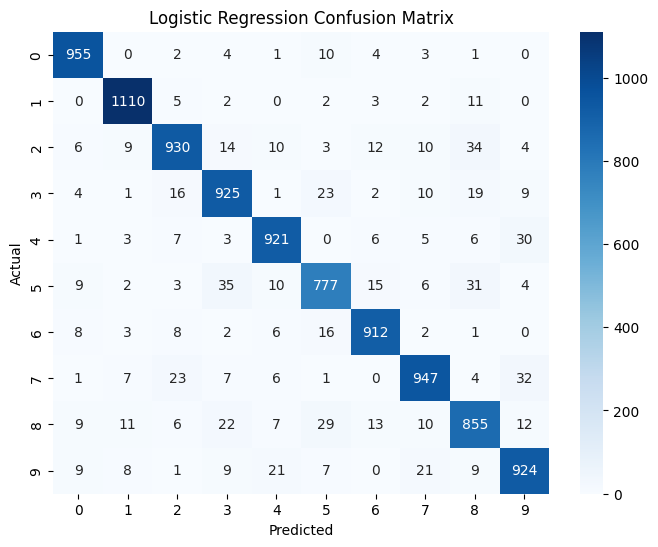

In [9]:
cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [11]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [12]:
history = cnn_model.fit(X_train_cnn, y_train_cat,
                        epochs=5,
                        validation_split=0.2)

Epoch 1/5


1500/1500 [==============================] - 50s 31ms/step - loss: 0.1716 - accuracy: 0.9487 - val_loss: 0.0846 - val_accuracy: 0.9758
Epoch 2/5
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0571 - accuracy: 0.9825 - val_loss: 0.0549 - val_accuracy: 0.9826
Epoch 3/5
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0359 - accuracy: 0.9891 - val_loss: 0.0533 - val_accuracy: 0.9837
Epoch 4/5
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.0562 - val_accuracy: 0.9841
Epoch 5/5
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.0621 - val_accuracy: 0.9830


In [13]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cat)

print("CNN Accuracy:", cnn_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.0583 - accuracy: 0.9827
CNN Accuracy: 0.982699990272522


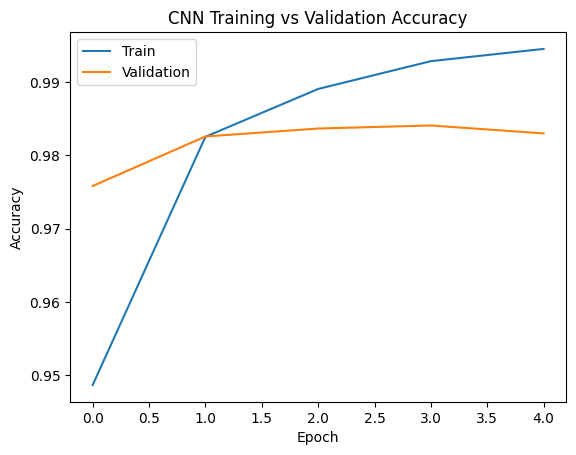

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("CNN Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

In [15]:
print("Logistic Regression Accuracy:", lr_accuracy)
print("CNN Accuracy:", cnn_accuracy)

Logistic Regression Accuracy: 0.9256
CNN Accuracy: 0.982699990272522
